# 06. 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

## 6.2 릿지 회귀

In [2]:
#보스턴 데이터 세트 로드
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target

from sklearn.model_selection import train_test_split

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

In [3]:
##릿지 회귀로 보스턴 주택 가격 예측, 예측 성능을 cross_val_score()로 평가

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 fords의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print('5 fords의 개별 RMSE scores:', np.round(rmse_scores, 3))
print('5 fords의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 fords의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 fords의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 fords의 평균 RMSE: 5.518


In [4]:
##alpha값의 변화에 따른 5폴드의 RMSE 평균값 반환하기

#릿지에 사용될 alpha 파라미터 값 정의
alphas = [0,0.1,1,10,100]

#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    #cross_val_score를 이용해 5폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE: 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE: 5.788
alpha 1 일 때 5 folds의 평균 RMSE: 5.653
alpha 10 일 때 5 folds의 평균 RMSE: 5.518
alpha 100 일 때 5 folds의 평균 RMSE: 5.330


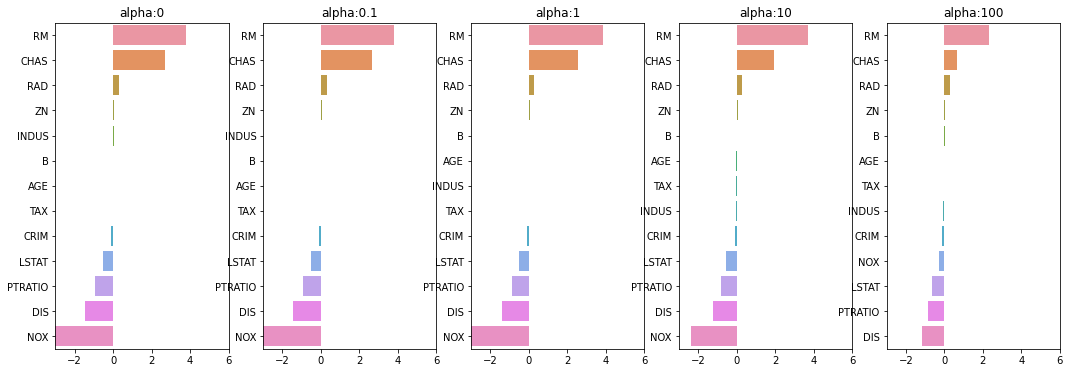

In [6]:
#alpha 값의 변화에 따른 피처의 회귀계수값을 가로 막대 그래프로 시각화하기

#각 alpha에 따른 회귀계수값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
#각 alpha에 따른 회귀계수값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

#alphas 리스트 값을 차례로 입력해 회귀계수값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    #alpha에 따른 피처별로 회귀계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    #막대그래프로 각 alpha값에서의 회귀계수를 시각화. 회귀계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
#for문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀계수를 DataFrame으로 표시
plt.show()

In [8]:
#DataFrame에 저장된 alpha값의 변화에 따른 릿지 회귀계수값 구하기
ridge_alphas = [0,0.1,1,10,100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


## 6.3 라쏘 회귀

In [11]:
##alpha값에 따른 폴드 평균 RMSE를 출력하고 회귀계수값들을 DataFrame으로 반환하는 함수 생성하기.

from sklearn.linear_model import Lasso, ElasticNet

#alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose: print('#######', model_name, '#######')
    for param in params:
        if model_name == 'Ridge': model=Ridge(alpha=param)
        elif model_name == 'Lasso': model=Lasso(alpha=param)
        elif model_name == 'ElasticNet': model=ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일 때 5폴드세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
        #cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data, y_target)
        #alpha에 따른 피처별 회귀계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = 'alpha:'+ str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [13]:
##생성한 함수를 이용해 라쏘 회귀에서의 alpha값의 변화에 따른 RMSE와 그때의 회귀계수들 출력

#라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

####### Lasso #######
alpha 0.07일 때 5폴드세트의 평균 RMSE: 5.612
alpha 0.1일 때 5폴드세트의 평균 RMSE: 5.615
alpha 0.5일 때 5폴드세트의 평균 RMSE: 5.669
alpha 1일 때 5폴드세트의 평균 RMSE: 5.776
alpha 3일 때 5폴드세트의 평균 RMSE: 6.189


In [14]:
#반환된 coeff_lasso_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


## 6.4 엘라스틱넷 회귀

In [15]:
##엘라스틱넷 회귀로 엘라스틱넷 alpha값 변화시키면서 RMSE와 각 피처의 회귀계수 출력하기 (위의 함수 이용)

#엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
#l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas, X_data_n=X_data, y_target_n=y_target)

####### ElasticNet #######
alpha 0.07일 때 5폴드세트의 평균 RMSE: 5.542
alpha 0.1일 때 5폴드세트의 평균 RMSE: 5.526
alpha 0.5일 때 5폴드세트의 평균 RMSE: 5.467
alpha 1일 때 5폴드세트의 평균 RMSE: 5.597
alpha 3일 때 5폴드세트의 평균 RMSE: 6.068


In [17]:
#반환된 coeff_elastic_ef를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


## 6.5 선형 회귀 모델을 위한 데이터 변환

In [24]:
#모듈 불러오기
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

In [25]:
##보스턴의 피처데이터세트에 변환 차례로 적용 후 RMSE로 각 경우별 예측 성능 측정

##이를 위해 get_scaled_data() 함수 생성

#method는 표준정규분포변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log) 결정
#p_degree는 다항식 특성을 추가할 때 적용. 2 이상을 부여하지 않음.
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [26]:
##Ridge 클래스의 alpha값 변화시키면서 여러 변환한 RMSE값의 변화 살펴보기 (get_linear_reg_eval() 함수 다시 이용)

#Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]

#5개 방식으로 변환. 먼저 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성, 최대최소정규화, 최대최소정규화+다항식특성, 로그변환
scale_methods = [ (None, None), ('Standard',None), ('Standard',2), ('MinMax',None), ('MinMax',2), ('Log',None) ]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5폴드세트의 평균 RMSE: 5.788
alpha 1일 때 5폴드세트의 평균 RMSE: 5.653
alpha 10일 때 5폴드세트의 평균 RMSE: 5.518
alpha 100일 때 5폴드세트의 평균 RMSE: 5.330

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5폴드세트의 평균 RMSE: 5.826
alpha 1일 때 5폴드세트의 평균 RMSE: 5.803
alpha 10일 때 5폴드세트의 평균 RMSE: 5.637
alpha 100일 때 5폴드세트의 평균 RMSE: 5.421

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5폴드세트의 평균 RMSE: 8.827
alpha 1일 때 5폴드세트의 평균 RMSE: 6.871
alpha 10일 때 5폴드세트의 평균 RMSE: 5.485
alpha 100일 때 5폴드세트의 평균 RMSE: 4.634

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5폴드세트의 평균 RMSE: 5.764
alpha 1일 때 5폴드세트의 평균 RMSE: 5.465
alpha 10일 때 5폴드세트의 평균 RMSE: 5.754
alpha 100일 때 5폴드세트의 평균 RMSE: 7.635

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5폴드세트의 평균 RMSE: 5.298
alpha 1일 때 5폴드세트의 평균 RMSE: 4.323
alpha 10일 때 5폴드세트의 평균 RMSE: 5.185
alpha 100일 때 5폴드세트의 평균 RMSE: 6.538

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5폴드세트의 평균 RMSE: 4.770
alpha 1일 때 5폴드세트의 평균 RMSE: 4.676
alpha 10

# 07. 로지스틱 회귀

In [27]:
##위스콘신 유방암 데이터 세트로 로지스틱회귀 이용 암 여부 판단

##데이터 호출
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

##학습/테스트 데이터세트로 나눈 뒤 로지스틱 회귀로 분류 수행
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#StandardScaler()로 평균0, 분산1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [28]:
##로지스틱회귀로 학습 및 예측 수행, 정확도와 roc-auc값 구하기

from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

#정확도와 roc_auc 측정
print('accuracy: {0:.3f}'.format(accuracy_score(y_test,lr_preds)))
print('roc_auc: {0:.3f}'.format(roc_auc_score(y_test,lr_preds)))

accuracy: 0.977
roc_auc: 0.972


In [30]:
##GridSearchCv 이용해 위스콘신 데이터 세트에서 penalty, C 하이퍼 파라미터 최적화

from sklearn.model_selection import GridSearchCV

params = { 'penalty':['l2','l1'], 'C':[0.01,0.1,1,1,5,10] }

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_v

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


# 08. 회귀 트리

In [31]:
##랜덤포레스트 회귀트리인 RandomForestRegressor를 이용해 보스턴 주택 가격 예측 수행하기

from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

#보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차검증의 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('5 교차검증의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 교차검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 교차검증의 개별 Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차검증의 개별 RMSE scores: [2.81 3.63 4.54 6.8  4.34]
5 교차검증의 평균 RMSE: 4.423
